In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [205]:
df=pd.read_csv('Real estate.csv')

In [206]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [207]:
df.drop(columns=['X1 transaction date','No'],axis=1,inplace=True)

In [208]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


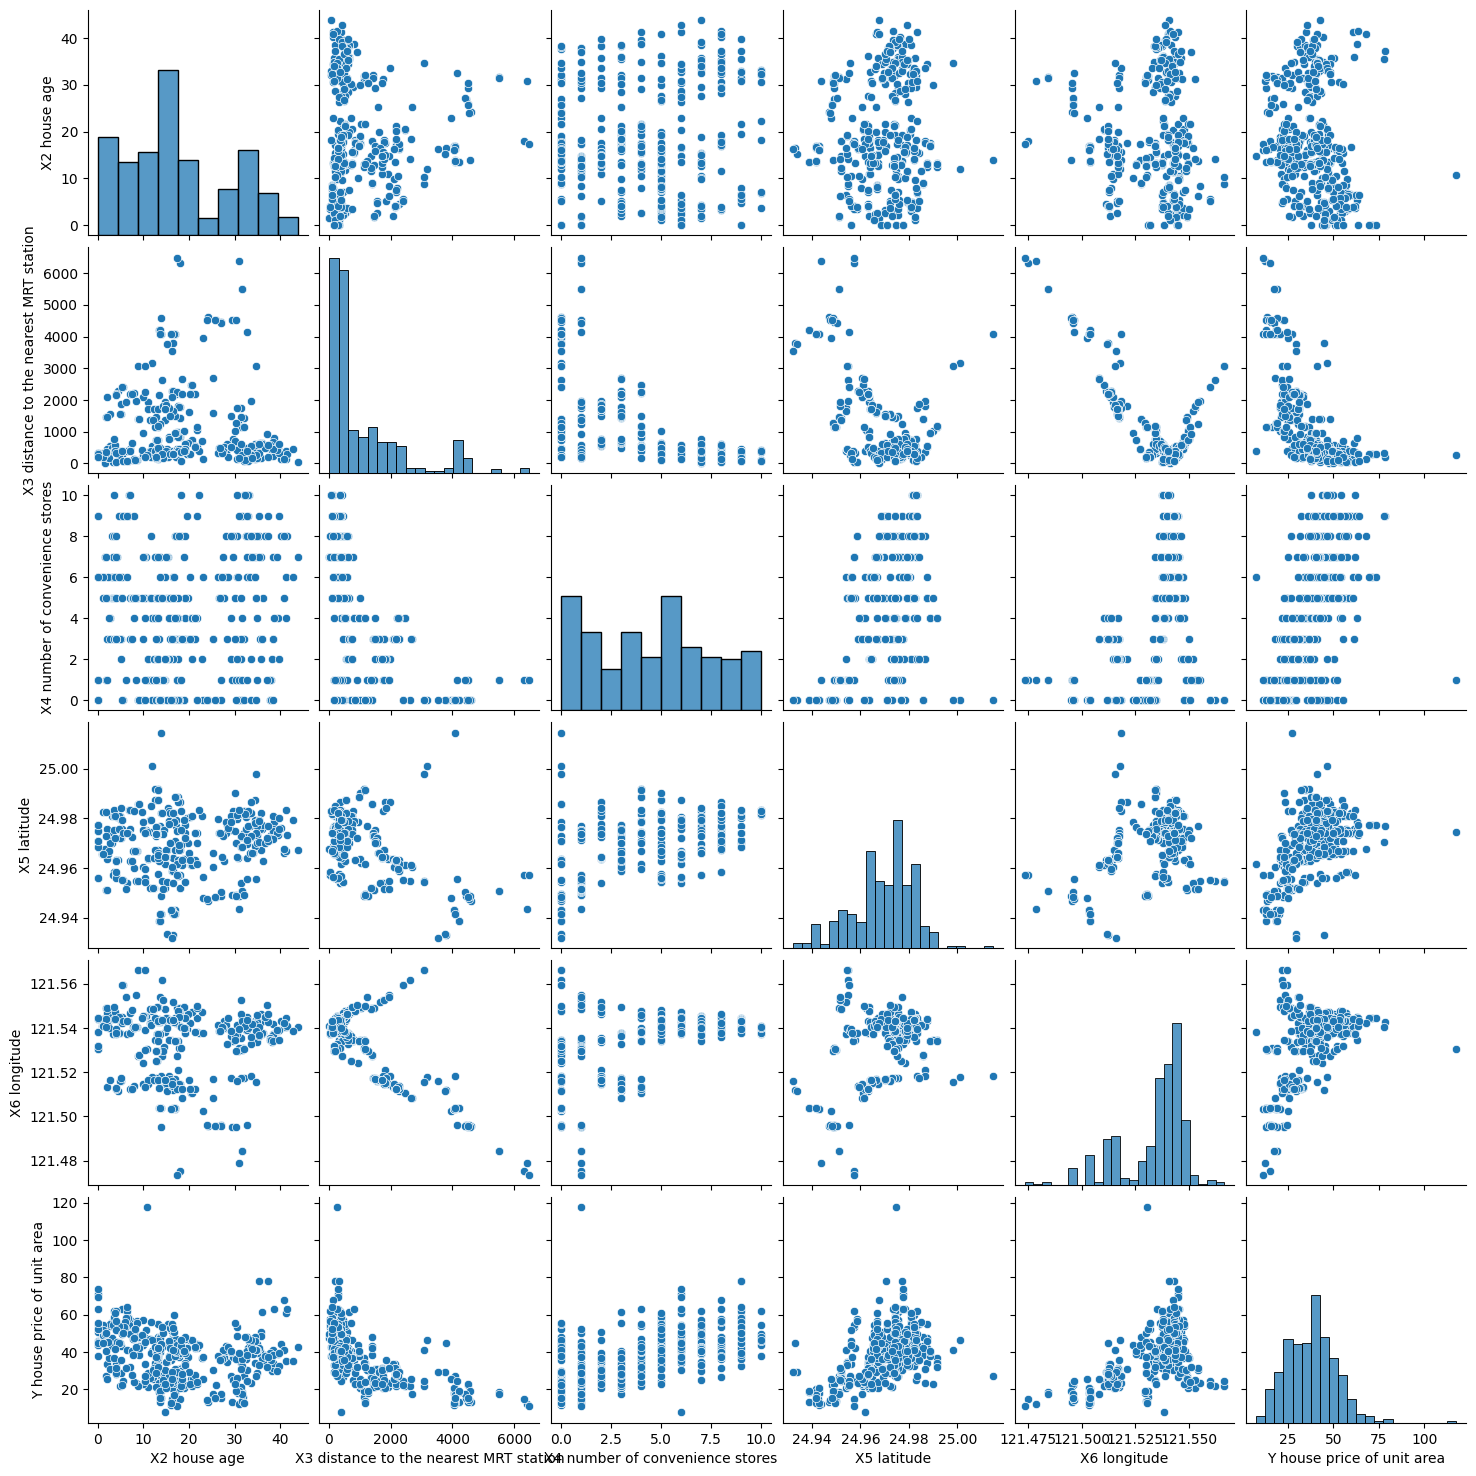

In [209]:
sns.pairplot(df)

In [210]:
X=df.iloc[:,:-1]
y=df['Y house price of unit area']

In [211]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [212]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [213]:
regression=LinearRegression()

In [214]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [215]:
y_pred=regression.predict(X_test)

In [216]:
score=r2_score(y_test,y_pred)

In [217]:
# Now using polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [218]:
poly=PolynomialFeatures(degree=2,include_bias=False)

In [219]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [220]:
X_train_poly

array([[ 2.34401494, -0.82396519,  0.96804159, ...,  0.0216284 ,
        -0.06692343,  0.2070771 ],
       [-0.82128138,  0.9514177 , -0.04917037, ...,  0.55222283,
         1.0076119 ,  1.83853635],
       [-0.90085586,  0.91722447, -0.38824102, ...,  0.25407123,
         0.71952963,  2.03770763],
       ...,
       [-0.5737163 , -0.66362097, -1.06638232, ...,  0.17851614,
        -0.09678782,  0.05247639],
       [-1.12189611, -0.65780025,  0.62897094, ...,  0.27330882,
         0.39417799,  0.5685008 ],
       [-1.43135245, -0.71213528,  0.62897094, ...,  0.0844854 ,
        -0.13615628,  0.21942883]], shape=(331, 20))

In [221]:
X_test_poly

array([[-1.43135245, -0.71213528,  0.62897094, ...,  0.0844854 ,
        -0.13615628,  0.21942883],
       [-0.36151767, -0.46655544,  0.28990029, ...,  0.11261941,
        -0.07820251,  0.05430354],
       [-1.52861016, -0.64599708, -1.06638232, ...,  0.19233149,
        -0.09665053,  0.04856887],
       ...,
       [-0.10511098, -0.20037405, -0.04917037, ...,  0.58409076,
         0.03856567,  0.00254637],
       [-0.14931903, -0.63340721,  0.28990029, ...,  1.03746998,
         0.65354995,  0.4117011 ],
       [-0.51182503,  0.24713256, -1.06638232, ...,  1.92460488,
        -1.34846166,  0.94479072]], shape=(83, 20))

In [226]:
regression.fit(X_train_poly, y_train)
y_pred2 = regression.predict(X_test_poly)
score2 = r2_score(y_test, y_pred2)

In [227]:
score2

0.7505332250103932